In [3]:
import pandas as pd
import scanpy as sc
import numpy as np
import torch

In [4]:
import pandas as pd

# Define the file path
file_path = "../data/ASD/expression_PertCortex.new.txt"

# Step 1: Count the total number of lines
total_lines = sum(1 for _ in open(file_path, 'r'))
print(f"Total number of lines: {total_lines}")

# Step 2: Read the file line by line and transpose
transposed_data = []
line_count = 0

with open(file_path, 'r') as file:
    for line in file:
        # Increment line counter
        line_count += 1

        # Process the line (split by tab and append to the list)
        transposed_data.append(line.strip().split('\t'))

        # Print progress every 1000 lines
        if line_count % 1000 == 0:
            print(f"Read {line_count} of {total_lines} lines...")

# Transpose the data
transposed_data = list(zip(*transposed_data))

# Convert the transposed data into a DataFrame
df_transposed = pd.DataFrame(transposed_data)

# Optionally, set the first row as column headers
df_transposed.columns = df_transposed.iloc[0]  # Use the first row as headers
df_transposed = df_transposed[1:]  # Remove the first row

print(f"Finished reading and transposing {line_count} lines.")
print(df_transposed.head())

Total number of lines: 27999
Read 1000 of 27999 lines...
Read 2000 of 27999 lines...
Read 3000 of 27999 lines...
Read 4000 of 27999 lines...
Read 5000 of 27999 lines...
Read 6000 of 27999 lines...
Read 7000 of 27999 lines...
Read 8000 of 27999 lines...
Read 9000 of 27999 lines...
Read 10000 of 27999 lines...
Read 11000 of 27999 lines...
Read 12000 of 27999 lines...
Read 13000 of 27999 lines...
Read 14000 of 27999 lines...
Read 15000 of 27999 lines...
Read 16000 of 27999 lines...
Read 17000 of 27999 lines...
Read 18000 of 27999 lines...
Read 19000 of 27999 lines...
Read 20000 of 27999 lines...
Read 21000 of 27999 lines...
Read 22000 of 27999 lines...
Read 23000 of 27999 lines...
Read 24000 of 27999 lines...
Read 25000 of 27999 lines...
Read 26000 of 27999 lines...
Read 27000 of 27999 lines...
Finished reading and transposing 27999 lines.
0                           GENE Xkr4 Gm1992 Gm37381 Rp1 Rp1.1 Sox17 Gm37323  \
1  PertCortex_1_AAACCTGAGAAGCCCA    0      0       0   0     0     0   

In [5]:
meta=pd.read_csv("../data/ASD/ASD_meta.txt",sep="\t")
print(meta)

                                 NAME    nGene     nUMI Cluster  Batch  \
0                                TYPE  numeric  numeric   group  group   
1       PertCortex_1_AAACCTGAGAAGCCCA     1228     2497      15      1   
2       PertCortex_1_AAACCTGAGCCACGTC      899     1577      25      1   
3       PertCortex_1_AAACCTGAGGATCGCA     3096     8459       1      1   
4       PertCortex_1_AAACCTGAGTTCGATC     1194     2277      11      1   
...                               ...      ...      ...     ...    ...   
49063  PertCortex_18_TTTGGTTTCGGCGCAT     1257     2255      26     18   
49064  PertCortex_18_TTTGTCAAGAACTCGG      664     1017      15     18   
49065  PertCortex_18_TTTGTCACAAGCGCTC     2071     4046       1     18   
49066  PertCortex_18_TTTGTCAGTAAGAGGA      892     1344      22     18   
49067  PertCortex_18_TTTGTCAGTGAAGGCT      652     1170      27     18   

          CellType Perturbation  isKey isAnalysed             SCRUBLET  
0            group        group  group

In [6]:
print(meta.iloc[1:,:])

                                 NAME nGene  nUMI Cluster Batch     CellType  \
1       PertCortex_1_AAACCTGAGAAGCCCA  1228  2497      15     1   Inhibitory   
2       PertCortex_1_AAACCTGAGCCACGTC   899  1577      25     1  Hippocampus   
3       PertCortex_1_AAACCTGAGGATCGCA  3096  8459       1     1   Excitatory   
4       PertCortex_1_AAACCTGAGTTCGATC  1194  2277      11     1    Astroglia   
5       PertCortex_1_AAACCTGCAAAGCAAT  1861  4984       2     1    Microglia   
...                               ...   ...   ...     ...   ...          ...   
49063  PertCortex_18_TTTGGTTTCGGCGCAT  1257  2255      26    18    Astroglia   
49064  PertCortex_18_TTTGTCAAGAACTCGG   664  1017      15    18   Inhibitory   
49065  PertCortex_18_TTTGTCACAAGCGCTC  2071  4046       1    18   Excitatory   
49066  PertCortex_18_TTTGTCAGTAAGAGGA   892  1344      22    18   Inhibitory   
49067  PertCortex_18_TTTGTCAGTGAAGGCT   652  1170      27    18    Microglia   

      Perturbation  isKey isAnalysed   

In [7]:
meta_df=meta.iloc[1:,:]

In [13]:
import pandas as pd
import anndata

# Check column names to verify structure
print(df_transposed.columns)

genes=df_transposed.columns.tolist()[1:]
print(genes)

# Use the correct column name for setting the index
expression = df_transposed.loc[:,genes]

# Coerce errors to NaN if there are non-numeric values
expression = expression.apply(pd.to_numeric, errors="coerce")

# Extract the values as a NumPy array
expression_values = expression.values

# Load metadata
metadata = meta_df.set_index("NAME")
metadata = metadata.loc[df_transposed.loc[:,"GENE"].values]

# Create AnnData object
adata = anndata.AnnData(
    X=expression,
    obs=metadata
)
print(adata)

Index(['GENE', 'Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Rp1.1', 'Sox17', 'Gm37323',
       'Mrpl15', 'Lypla1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'PISD', 'DHRSX', 'Vmn2r122', 'CAAA01147332.1'],
      dtype='object', name=0, length=27999)
['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Rp1.1', 'Sox17', 'Gm37323', 'Mrpl15', 'Lypla1', 'Gm37988', 'Tcea1', 'Rgs20', 'Gm16041', 'Atp6v1h', 'Oprk1', 'Npbwr1', 'Rb1cc1', '4732440D04Rik', 'Fam150a', 'St18', 'Pcmtd1', 'Gm26901', 'Gm30414', 'Sntg1', 'Rrs1', 'Adhfe1', '3110035E14Rik', 'Gm29520', 'Mybl1', 'Vcpip1', '1700034P13Rik', 'Sgk3', 'Mcmdc2', 'Snhg6', 'Tcf24', 'Ppp1r42', 'Gm15818', 'Cops5', 'Cspp1', 'Arfgef1', 'Cpa6', 'Prex2', 'A830018L16Rik', 'Gm17644', 'Gm29663', 'Sulf1', 'Slco5a1', 'Gm29283', 'Prdm14', 'Ncoa2', 'Gm29570', 'Tram1', 'Lactb2', 'Xkr9', 'Eya1', 'Gm9947', 'Msc', 'Trpa1', 'Kcnb2', 'Terf1', 'Sbspon', '4930444P10Rik', 'Rpl7', 'Rdh10', 'Gm28095', 'Stau2', 'Gm7568', 'Ube2w', '

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:307: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


In [14]:
adata.var_names=genes

In [15]:
print(np.sum(adata.X==0)/adata.X.shape[0]/adata.X.shape[1])

0.9084992522364602


In [16]:
print(adata.X[:10,:10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         5.15311265 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         5.21995011 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.

In [17]:
from scipy.sparse import csr_matrix

# Convert adata.X to a sparse matrix
adata.X = csr_matrix(adata.X)

In [18]:
adata.write("../data/ASD.h5ad")

In [19]:
adata=sc.read_h5ad("../data/ASD.h5ad")

In [20]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [26]:
# Iterate through each column in adata.obs
for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].values
    # Check if the column has string or mixed types
    if adata.obs[col].dtype == object or isinstance(adata.obs[col].iloc[0], str):
        # Convert the column to string
        adata.obs[col] = adata.obs[col].astype(str)

In [31]:
for i in adata.obs.columns[1:]:
    if not isinstance(adata.obs[i][0] , str):
        continue
    uniquei=np.unique(adata.obs[i])
    if len(uniquei)<=100:
        print(i,uniquei)

Cluster ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '5' '6' '7' '8' '9']
Batch ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '2' '3' '4' '5' '6' '7'
 '8' '9']
CellType ['Astroglia' 'Choroid Plexus' 'Doublet' 'Ependyma' 'Excitatory'
 'Fibroblast-like' 'Hippocampus' 'IPC' 'Inhibitory' 'Microglia' 'ODC'
 'Vascular']
Perturbation ['Adnp' 'Ank2' 'Ankrd11' 'Arid1b' 'Ash1l' 'Asxl3' 'Chd2' 'Chd8' 'Ctnnb1'
 'Cul3' 'Ddx3x' 'Dscam' 'Dyrk1a' 'Fbxo11' 'GFP' 'Gatad2b' 'Kdm5b' 'Larp4b'
 'Map1a' 'Mbd5' 'Med13l' 'Mll1' 'Myst4' 'NotKey' 'Pogz' 'Pten' 'Qrich1'
 'Satb2' 'Scn2a1' 'Setd2' 'Setd5' 'Spen' 'Stard9' 'Suv420h1' 'Syngap1'
 'Tcf20' 'Tcf7l2' 'Tnrc6b' 'Upf3b' 'Wac' 'nan']
isKey ['FALSE' 'TRUE']
isAnalysed ['FALSE' 'TRUE']


/tmp/ipykernel_3395460/3243994139.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not isinstance(adata.obs[i][0] , str):


In [29]:
print(adata.obs["Perturbation"].dtype,np.unique(adata.obs["Perturbation"]))

object ['Adnp' 'Ank2' 'Ankrd11' 'Arid1b' 'Ash1l' 'Asxl3' 'Chd2' 'Chd8' 'Ctnnb1'
 'Cul3' 'Ddx3x' 'Dscam' 'Dyrk1a' 'Fbxo11' 'GFP' 'Gatad2b' 'Kdm5b' 'Larp4b'
 'Map1a' 'Mbd5' 'Med13l' 'Mll1' 'Myst4' 'NotKey' 'Pogz' 'Pten' 'Qrich1'
 'Satb2' 'Scn2a1' 'Setd2' 'Setd5' 'Spen' 'Stard9' 'Suv420h1' 'Syngap1'
 'Tcf20' 'Tcf7l2' 'Tnrc6b' 'Upf3b' 'Wac' 'nan']


In [35]:
perturb01=['nan' if i=='nan' else 'mutated' for i in adata.obs["Perturbation"]]
adata.obs["perturb01"]=perturb01

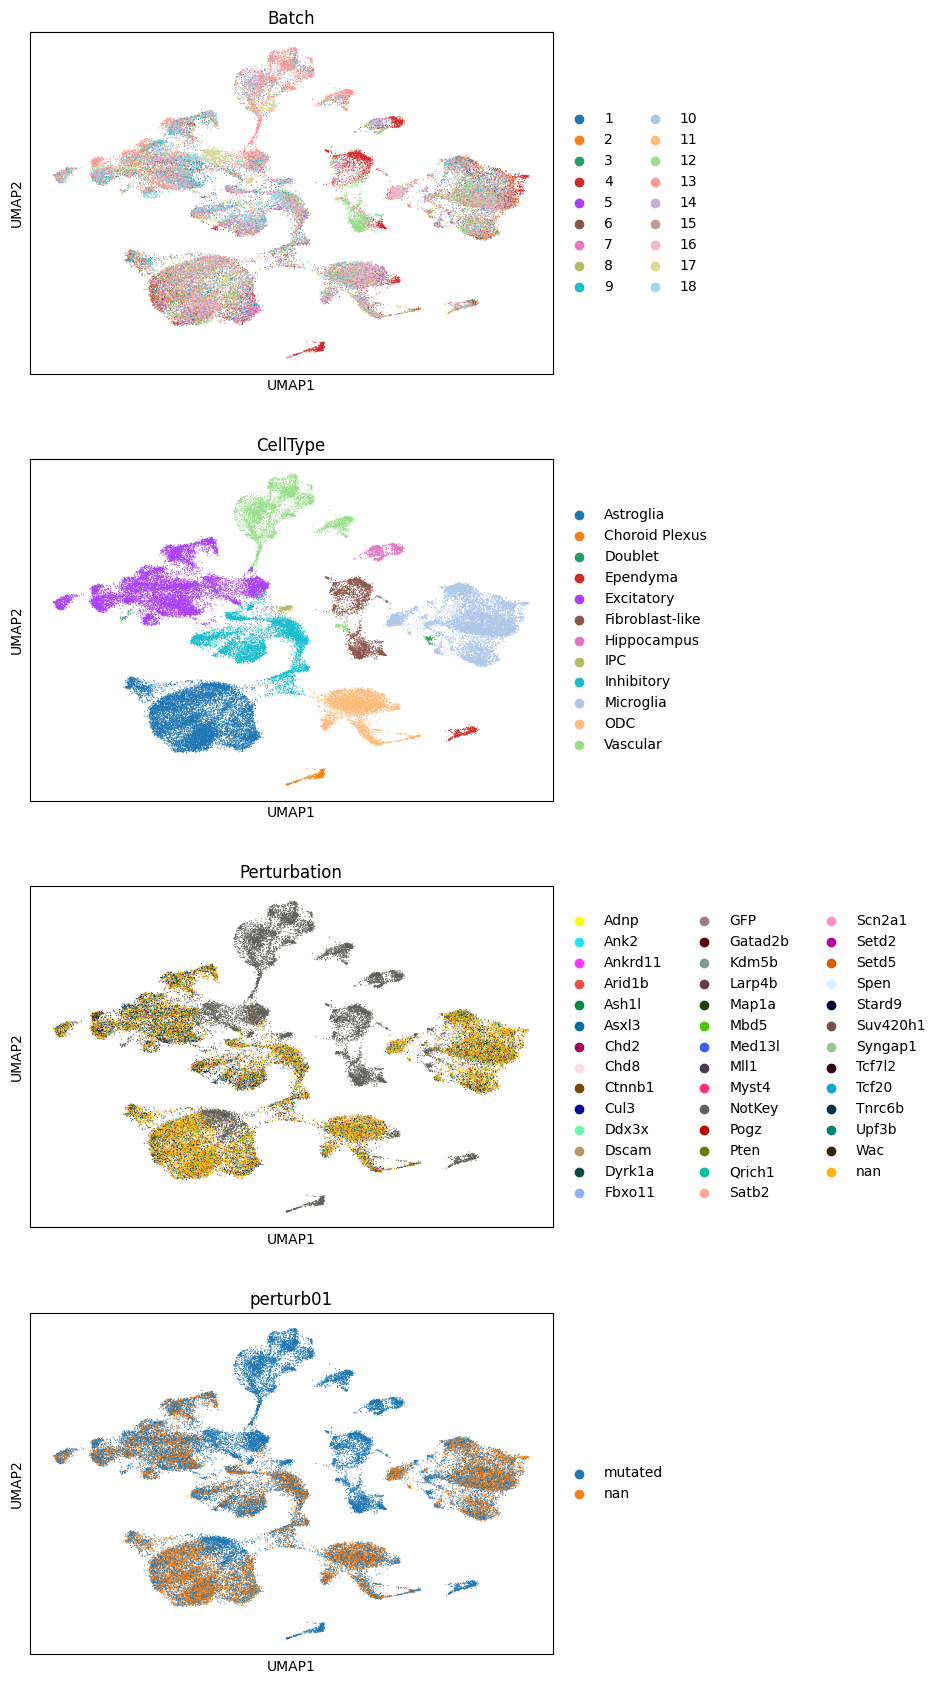

In [36]:
sc.pl.umap(adata,color=["Batch","CellType","Perturbation","perturb01"],ncols=1)

In [37]:
adata.write("../data/ASD.h5ad")

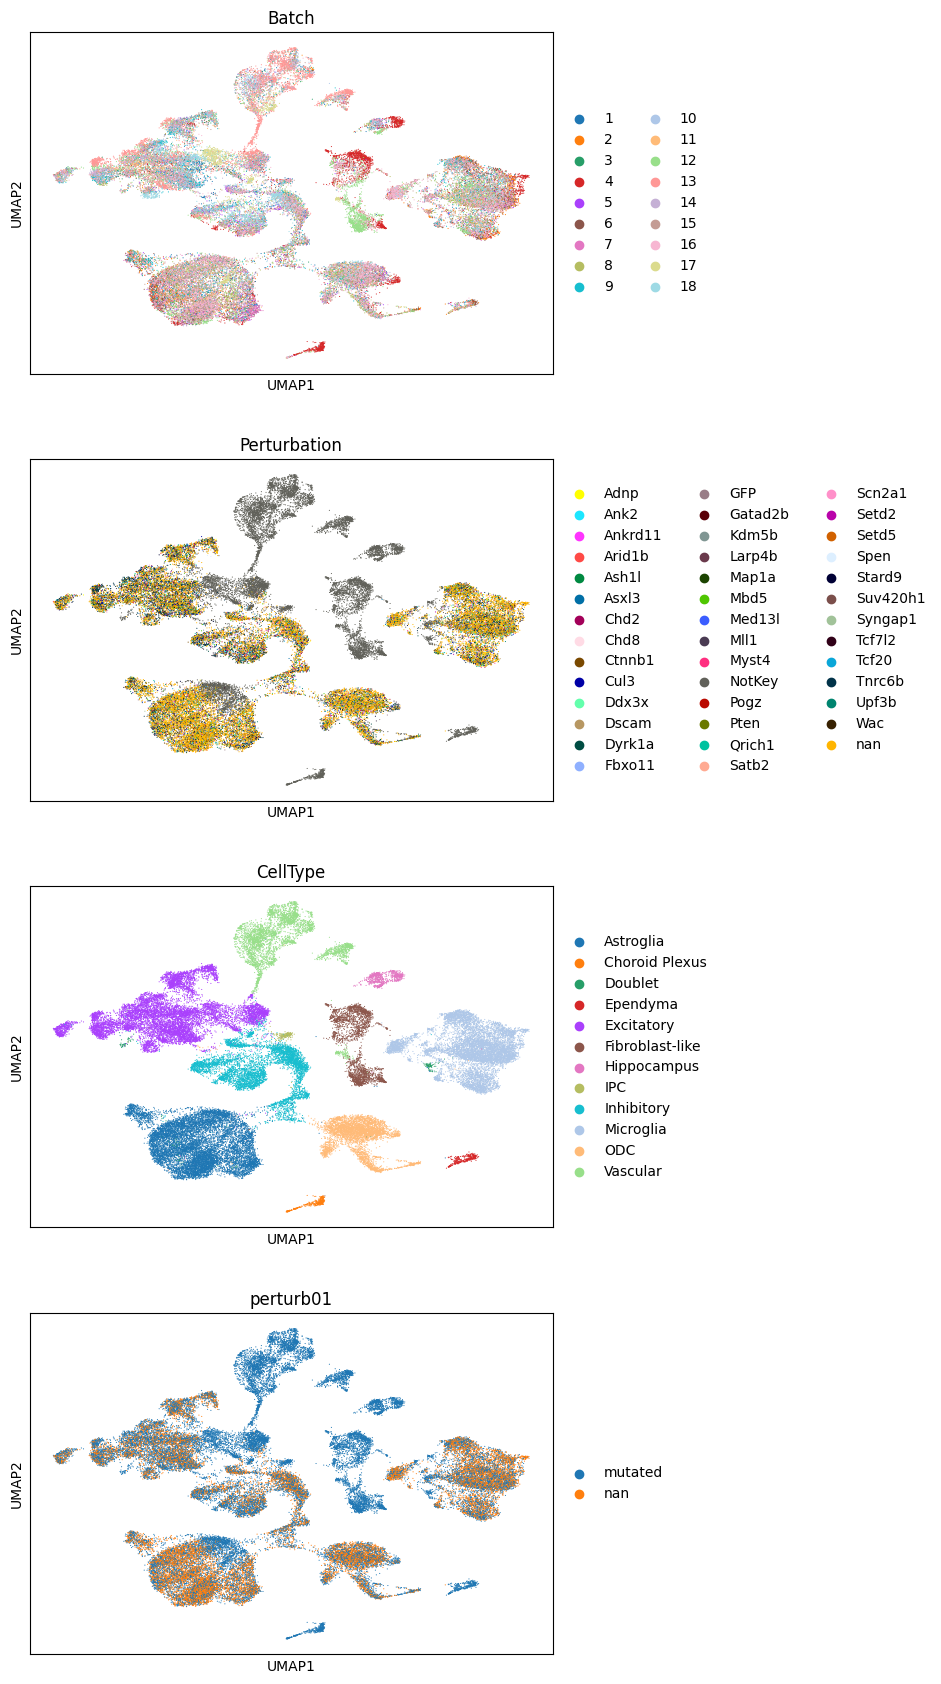

['Astroglia', 'Choroid Plexus', 'Doublet', 'Ependyma', 'Excitatory', 'Fibroblast-like', 'Hippocampus', 'IPC', 'Inhibitory', 'Microglia', 'ODC', 'Vascular']


In [4]:
import pandas as pd
import scanpy as sc
import numpy as np
import torch

adata=sc.read_h5ad("../data/ASD.h5ad")
sc.pl.umap(adata,color=["Batch","Perturbation","CellType","perturb01"],ncols=1)
print(np.unique(adata.obs["CellType"]).tolist())

In [5]:
adata1=adata[adata.obs["CellType"].isin(['Astroglia', 'Excitatory', 'Inhibitory', 'Microglia', 'ODC'])].copy()
adata1.write_h5ad("../data/ASD1.h5ad")